# Mushroom ML Models

This notebook contains the implementation of the following ML models on the Mushroom dataset:
- Logistic Regression
- Decision Trees
- Support Vector Machines
- ANN


## Setting up

In [7]:
!pip install pandas
!pip install seaborn

In [8]:
!pip install scipy

In [9]:
!pip install scikit-learn

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr

In [2]:
# import sklearn
import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Import mushroom dataset

In [3]:
df = pd.read_csv('mushrooms.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [6]:
# check for null values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
# separate features and target variables
y = df['class'] # target!
X = X = df.drop(columns='class') # drop target column

In [8]:
# need to encode the features for the ML models, as they can't take non-integer values
labelEncoder = preprocessing.LabelEncoder()
X_encoded = X[X.columns].apply(labelEncoder.fit_transform)

In [9]:
X_encoded

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


## Scale the data

The model struggles to converge, which means that it's not actually able to generate the solutions in the given number of iterations. This is probably because too many features are given in X, or perhaps it's cause the scale is quite large. Here, we will scale of the dataset.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
x_encoded = scaler.fit_transform(X_encoded)

## Split the data

In [13]:
# 70-30 split for train and test. 
# random state to ensure repeatedness

x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=42)

## Logistic Regression

In [23]:
# Create the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(x_train, y_train)

LogisticRegression()

In [24]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [25]:
# predict the values from the test set
y_pred = model.predict(x_test)

In [26]:
y_pred

array(['e', 'p', 'p', ..., 'p', 'e', 'e'], dtype=object)

In [27]:
y_test

1971    e
6654    p
5606    p
3332    e
6988    p
       ..
462     e
1956    e
3781    p
799     e
2402    e
Name: class, Length: 2438, dtype: object

In [28]:
# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy * 100, 2)}%')

Accuracy: 95.16%


### Evaluating logistic regression

In [29]:
# confusion matrix can help us see where the true/false positives and negatives are
confusion = confusion_matrix(y_test, y_pred)

In [30]:
sns.set(font_scale=1.2)

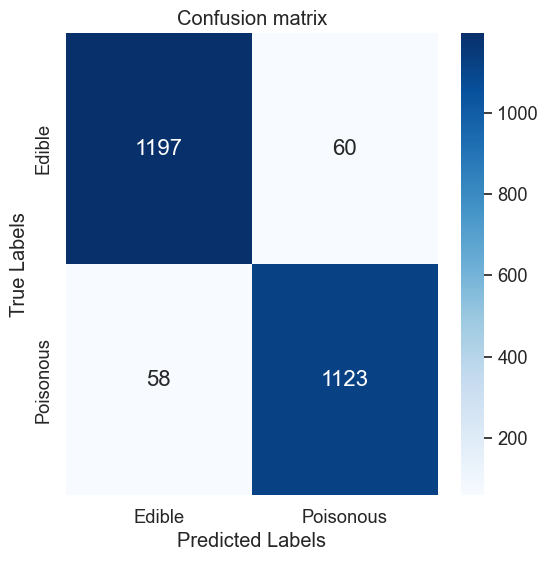

In [31]:
plt.figure(figsize=(6,6))

labels = ['Edible', 'Poisonous']

sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', annot_kws={"size":16}, xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion matrix')

plt.show()

In [32]:
# generate the classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           e       0.95      0.95      0.95      1257
           p       0.95      0.95      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



### K-fold

In [33]:
# setting the number of folds
k = 5

In [34]:
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

In [35]:
model = LogisticRegression()
accuracy_scores = []

for train_index, test_index in kf.split(x_encoded, y):
    x_train, x_test = x_encoded[train_index], x_encoded[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

In [36]:
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.9558099280030314


In [37]:
accuracy_scores

[0.9501538461538461,
 0.9532307692307692,
 0.9667692307692307,
 0.9532307692307692,
 0.9556650246305419]

## Decision trees

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text

In [39]:
dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [40]:
dtree.predict_proba(x_test)

array([[0.99034892, 0.00965108],
       [0.99034892, 0.00965108],
       [0.99034892, 0.00965108],
       ...,
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ]])

In [41]:
classifier_score = dtree.score(x_test, y_test)
print('The classifier accuracy score of Decision Tree is {:03.2f}'.format(classifier_score))

The classifier accuracy score of Decision Tree is 0.98


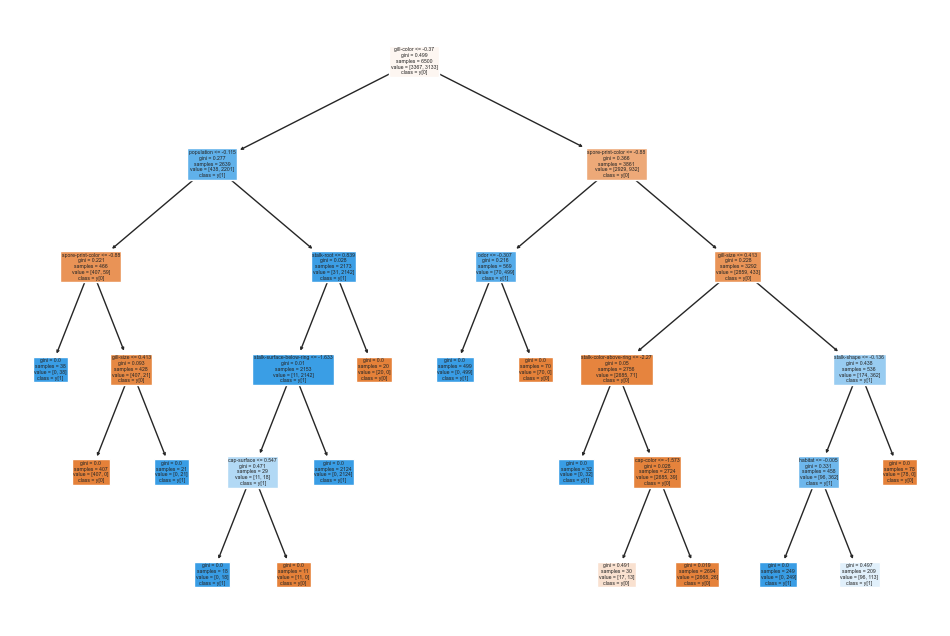

In [42]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dtree, filled=True, feature_names=X.columns, class_names=True)
plt.show()

In [43]:
# prints out tree rules
tree_rules = export_text(dtree, feature_names=list(X.columns))
print(tree_rules)

|--- gill-color <= -0.37
|   |--- population <= -0.12
|   |   |--- spore-print-color <= -0.88
|   |   |   |--- class: p
|   |   |--- spore-print-color >  -0.88
|   |   |   |--- gill-size <= 0.41
|   |   |   |   |--- class: e
|   |   |   |--- gill-size >  0.41
|   |   |   |   |--- class: p
|   |--- population >  -0.12
|   |   |--- stalk-root <= 0.84
|   |   |   |--- stalk-surface-below-ring <= -1.63
|   |   |   |   |--- cap-surface <= 0.55
|   |   |   |   |   |--- class: p
|   |   |   |   |--- cap-surface >  0.55
|   |   |   |   |   |--- class: e
|   |   |   |--- stalk-surface-below-ring >  -1.63
|   |   |   |   |--- class: p
|   |   |--- stalk-root >  0.84
|   |   |   |--- class: e
|--- gill-color >  -0.37
|   |--- spore-print-color <= -0.88
|   |   |--- odor <= -0.31
|   |   |   |--- class: p
|   |   |--- odor >  -0.31
|   |   |   |--- class: e
|   |--- spore-print-color >  -0.88
|   |   |--- gill-size <= 0.41
|   |   |   |--- stalk-color-above-ring <= -2.27
|   |   |   |   |--- class

### K-fold

In [45]:
from sklearn.model_selection import cross_val_score

k_range = range(2,11)
k_scores = []
k_dict = {}
for k in k_range:
    dt = DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(dt, x_encoded, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    k_dict[k] = scores.mean()

key_with_highest_value = max(k_dict, key=lambda k: k_dict[k])

print(key_with_highest_value)

print(k_dict)

10
{2: 0.8840755821351317, 3: 0.9298641533213361, 4: 0.9312129254297469, 5: 0.934907506710535, 6: 0.9522632529280959, 7: 0.9543565460285144, 8: 0.9506619647477261, 9: 0.956689025018329, 10: 0.9611225225552747}


## Support Vector Machines

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=42)

In [15]:
from sklearn.svm import SVC
clf = SVC(C=1.0, kernel='linear', degree=3, gamma=0.1, probability=True)
clf.fit(x_train, y_train)

SVC(gamma=0.1, kernel='linear', probability=True)

In [17]:
y_pred = clf.predict(x_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9913863822805579


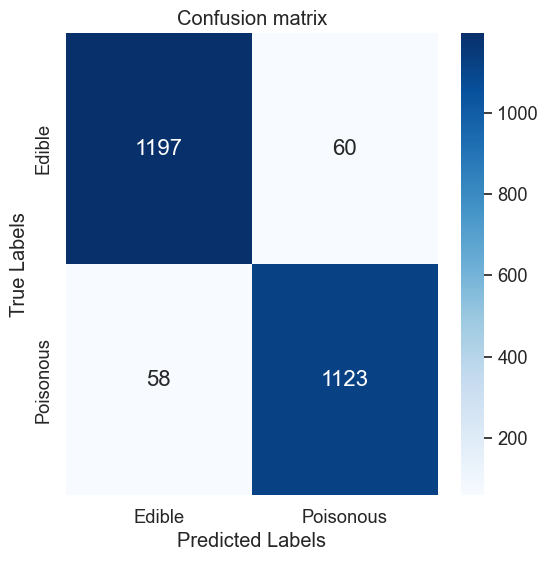

In [49]:
sns.set(font_scale=1.2)

plt.figure(figsize=(6,6))

labels = ['Edible', 'Poisonous']

sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', annot_kws={"size":16}, xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion matrix')

plt.show()

### K-fold

In [ ]:
# setting the number of folds
k = 5

kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
accuracy_scores = []

for train_index, test_index in kf.split(x_encoded, y):
    x_train, x_test = x_encoded[train_index], x_encoded[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = SVC(C=1.0, kernel='linear', degree=3, gamma=0.1, probability=True)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

In [ ]:
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("Average Accuracy:", average_accuracy)

In [ ]:
accuracy_scores

In [ ]:
sns.set(style="whitegrid") 

plt.figure(figsize=(8, 6))
sns.barplot(x=list(range(1, len(accuracy_scores) + 1)), y=accuracy_scores, palette="Blues") 

plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores for K-Fold Cross-Validation")

plt.show()

## ANN

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.preprocessing import LabelEncoder
# encode target variable
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

In [ ]:
# split dataset into 3 for test train and validation
x_train, x_buffer, y_train, y_buffer = train_test_split(x_encoded, encoded_y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_buffer, y_buffer, test_size=0.5, random_state=42)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(22,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=2, validation_data=(x_val, y_val))

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

### K fold

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

In [ ]:
# creating the ANN
from keras.layers import Flatten
def createANN():
    model = Sequential()
    # Add layers to your model
    model.add(Flatten(input_shape=(22,)))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=2, activation='softmax')) 
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    return model

In [ ]:
train_scores = []
val_scores = []

for train_index, val_index in kf.split(x_encoded, encoded_y):
    x_train, x_val = x_encoded[train_index], x_encoded[val_index]
    y_train, y_val = encoded_y[train_index], encoded_y[val_index]

    model = createANN()
    model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)
    
    train_score = model.evaluate(x_train, y_train, verbose=0)
    val_score = model.evaluate(x_val, y_val, verbose=0)

    train_scores.append(train_score[1])
    val_scores.append(val_score[1])

In [ ]:
print(f'Average Training Accuracy: {np.mean(train_scores):.4f}')
print(f'Average Validation Accuracy: {np.mean(val_scores):.4f}')